<a href="https://colab.research.google.com/github/ImanSafadr/ApexcifyTechnologys_TASK-2/blob/main/Visualize_Monthly_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import lineStyles
import seaborn as sns


# Load Dataset

In [ ]:
data = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
data.shape

(2823, 25)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
data.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


#**use heatmap to show missing values in rows**

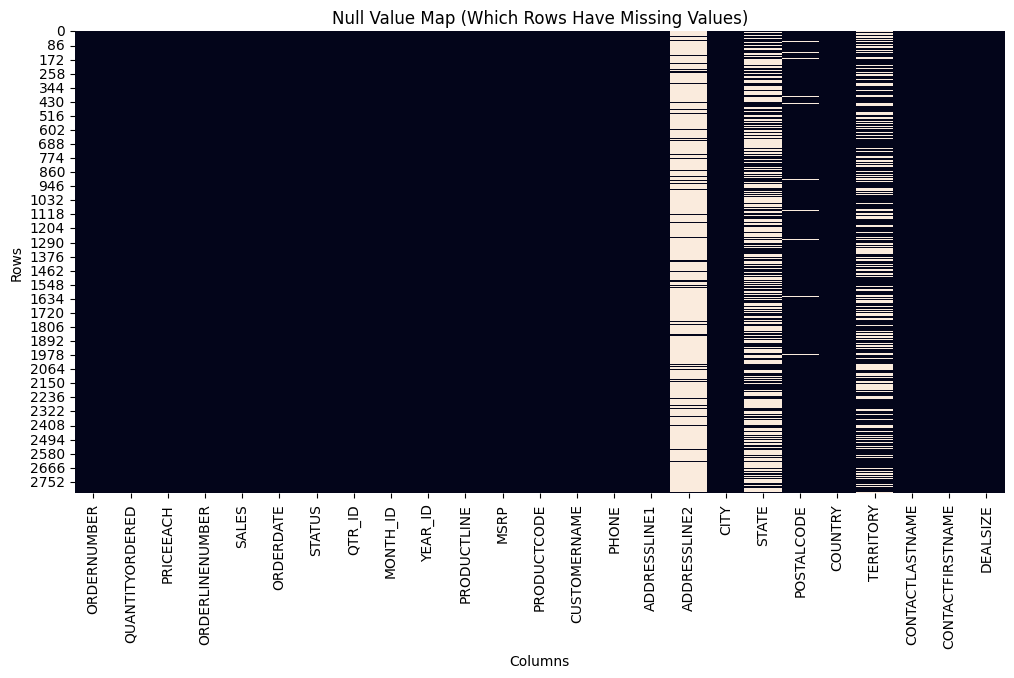

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Null Value Map (Which Rows Have Missing Values)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

#**Feature Extraction**

In [ ]:

data = data.drop(['STATE','QUANTITYORDERED','TERRITORY','ORDERDATE','QTR_ID','MSRP','PRODUCTCODE','CONTACTLASTNAME','ADDRESSLINE1','ADDRESSLINE2','CITY','CONTACTFIRSTNAME','POSTALCODE','PHONE','PRODUCTLINE','CUSTOMERNAME','COUNTRY','ORDERLINENUMBER','DEALSIZE'],axis=1)

In [ ]:
data.columns

Index(['ORDERNUMBER', 'PRICEEACH', 'SALES', 'STATUS', 'MONTH_ID', 'YEAR_ID'], dtype='object')

In [ ]:
data.shape

(2823, 6)

In [ ]:
data

,ORDERNUMBER,PRICEEACH,SALES,STATUS,MONTH_ID,YEAR_ID
0,10107,95.70,2871.00,Shipped,2,2003
1,10121,81.35,2765.90,Shipped,5,2003
2,10134,94.74,3884.34,Shipped,7,2003
3,10145,83.26,3746.70,Shipped,8,2003
4,10159,100.00,5205.27,Shipped,10,2003
...,...,...,...,...,...,...
2818,10350,100.00,2244.40,Shipped,12,2004
2819,10373,100.00,3978.51,Shipped,1,2005
2820,10386,100.00,5417.57,Resolved,3,2005
2821,10397,62.24,2116.16,Shipped,3,2005


In [ ]:
data['MONTH_ID']=data['MONTH_ID'].astype(int)
data=data.sort_values(by='MONTH_ID')

***To convert the MonthID into month names**, I created a dictionary that maps each numeric month (1–12) to its corresponding month name, and then used the map() function to replace the MonthID values with the actual month*

In [ ]:
month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
              7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

data['Month'] = data['MONTH_ID'].map(month)



# **Read sales data of a company for 12 months**

In [ ]:
monthly_sales = data.groupby('Month')['SALES'].sum()

print("Monthly Sales Data:")
print("===================")
for month_name, sales_amount in monthly_sales.items():
    print(f"{month_name}: ${sales_amount:,.2f}")

# Calculate total and average
total_annual_sales = monthly_sales.sum()
average_monthly_sales = monthly_sales.mean()

print(f"\nTotal Annual Sales: ${total_annual_sales:,.2f}")
print(f"Average Monthly Sales: ${average_monthly_sales:,.2f}")

Monthly Sales Data:
Apr: $669,390.96
Aug: $659,310.57
Dec: $634,679.12
Feb: $810,441.90
Jan: $785,874.44
Jul: $514,875.97
Jun: $454,756.78
Mar: $754,501.39
May: $923,972.56
Nov: $2,118,885.67
Oct: $1,121,215.22
Sep: $584,724.27

Total Annual Sales: $10,032,628.85
Average Monthly Sales: $836,052.40


#**Visulization**

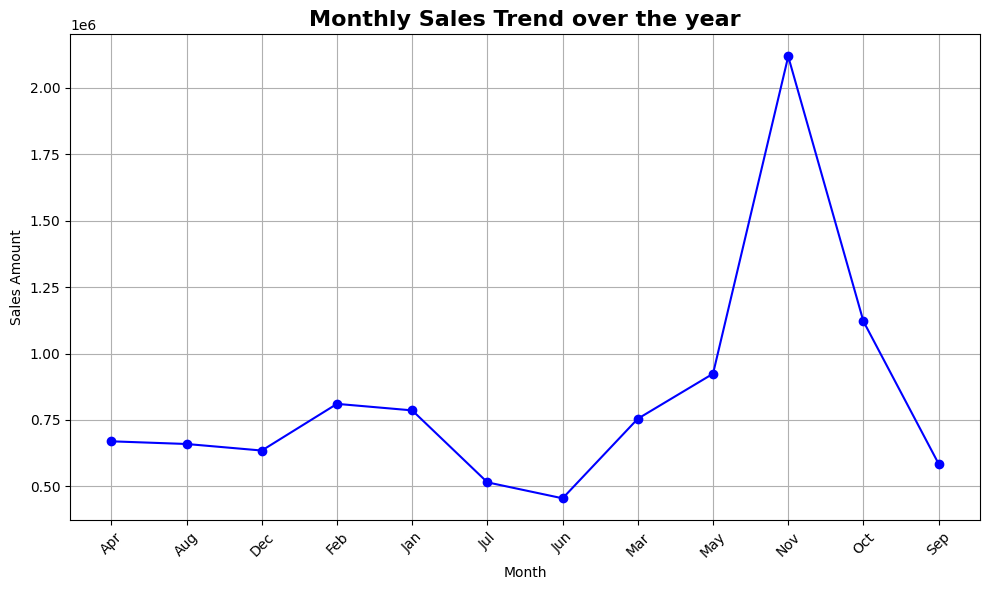

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend over the year',fontsize=16,fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()